# 1. Importing Libraries and Data Set

In [557]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [601]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sn # data visualization
import matplotlib.pyplot as plt # data visualization
from mpl_toolkits import mplot3d # to create 3D figures
%matplotlib inline   

import ipywidgets as widgets #to create buttons
from ipywidgets import interact, interact_manual
from ipywidgets import Button, Layout

import scipy

import plotly.express as px # data visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import display
from IPython.display import Image 

In [558]:
data = pd.read_csv('Germany_Housing_data.csv') # inserting the data set
data_col = data.columns.tolist() #creating list of column names


# 2. Dataset Familiarity and selecting target variabel(s)

In [559]:
data.head(10) # displaying the first 10 rows of the dataset

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,NaN,01.10.2020,5.5,3.0,1.0,2.0,2005.0,normal,NaN,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,NaN,1994.0,basic,NaN,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.0,2013.0,NaN,NaN,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,259000.0,Farmhouse,140.00,814.0,NaN,nach Vereinbarung,4.0,NaN,2.0,2.0,1900.0,basic,2000.0,Baden-Württemberg,Waldshut (Kreis),Bonndorf im Schwarzwald,1.0,Garage
4,469000.0,Multiple dwelling,115.00,244.0,NaN,sofort,4.5,2.0,1.0,NaN,1968.0,refined,2019.0,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage
5,1400000.0,Mid-terrace house,310.00,860.0,100.00,sofort,8.0,NaN,NaN,3.0,1969.0,basic,NaN,Baden-Württemberg,Stuttgart,Süd,2.0,Garage
6,3500000.0,Duplex,502.00,5300.0,163.16,nach Absprache,13.0,NaN,4.0,NaN,2004.0,basic,NaN,Baden-Württemberg,Göppingen (Kreis),Wangen,7.0,Parking lot
7,630000.0,Duplex,263.00,406.0,118.00,01.04.2020,10.0,NaN,NaN,3.0,1989.0,basic,NaN,Baden-Württemberg,Freiburg im Breisgau,Munzingen,2.0,Garage
8,364000.0,Duplex,227.00,973.0,83.00,nach Absprache,10.0,4.0,4.0,2.0,1809.0,normal,2015.0,Baden-Württemberg,Enzkreis,Neuenbürg,8.0,Parking lot
9,1900000.0,Duplex,787.00,933.0,NaN,NaN,30.0,NaN,NaN,3.0,1920.0,basic,NaN,Baden-Württemberg,Mannheim,Rheinau,12.0,Parking lot


In [560]:
data.info() # information on the dataset variables and the shape of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               4999 non-null   float64
 1   Type                4784 non-null   object 
 2   Living_space        4999 non-null   float64
 3   Lot                 4999 non-null   float64
 4   Usable_area         2792 non-null   float64
 5   Free_of_Relation    3377 non-null   object 
 6   Rooms               4999 non-null   float64
 7   Bedrooms            3314 non-null   float64
 8   Bathrooms           4185 non-null   float64
 9   Floors              3762 non-null   float64
 10  Year_built          4671 non-null   float64
 11  Furnishing_quality  3602 non-null   object 
 12  Year_renovated      2483 non-null   float64
 13  State               4998 non-null   object 
 14  City                4998 non-null   object 
 15  Place               4709 non-null   object 
 16  Garage

In [561]:
data.shape

(4999, 18)

In [562]:
data.describe().T # statistical analysis of the numerical variables

,count,mean,std,min,25%,50%,75%,max
Price,4999.0,692930.125847,731384.045034,0.0,330000.0,520000.0,795000.0000,13000000.0
Living_space,4999.0,220.444429,166.281959,1.0,135.0,180.0,254.0000,4034.0
Lot,4999.0,1550.816553,10818.430537,0.0,366.0,645.0,1012.0000,547087.0
Usable_area,2792.0,135.287375,197.295007,0.0,48.0,81.0,151.3275,4034.0
Rooms,4999.0,7.473095,5.153984,1.0,5.0,6.0,9.0000,100.0
Bedrooms,3314.0,4.331020,2.862682,0.0,3.0,4.0,5.0000,61.0
Bathrooms,4185.0,2.353166,1.939822,0.0,1.0,2.0,3.0000,44.0
Floors,3762.0,2.392344,0.849934,0.0,2.0,2.0,3.0000,13.0
Year_built,4671.0,1963.265468,57.102779,1318.0,1950.0,1975.0,1997.5000,2022.0
Year_renovated,2483.0,2010.797020,10.142055,1947.0,2006.0,2015.0,2018.0000,2022.0


In [563]:
print('Please select target variables')
button_list = list(range(0,len(data_col)))
target_list = list()

#printing the buttons with the names of the variables to select a target varibale
for i in range(0,len(data_col)):                                  
    button_list[i] = widgets.Button(description = data_col[i])
    output = widgets.Output()
    display(button_list[i],output,data.dtypes[data_col[i]])
    
def on_button_clicked(b):
    target_list.append(b.description)
    print (target_list)

for i in range(0,len(data_col)):
    button_list[i].on_click(on_button_clicked)  #send value of i with function on_click


Please select target variables


Button(description='Price', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Type', style=ButtonStyle())

Output()

dtype('O')

Button(description='Living_space', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Lot', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Usable_area', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Free_of_Relation', style=ButtonStyle())

Output()

dtype('O')

Button(description='Rooms', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Bedrooms', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Bathrooms', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Floors', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Year_built', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Furnishing_quality', style=ButtonStyle())

Output()

dtype('O')

Button(description='Year_renovated', style=ButtonStyle())

Output()

dtype('float64')

Button(description='State', style=ButtonStyle())

Output()

dtype('O')

Button(description='City', style=ButtonStyle())

Output()

dtype('O')

Button(description='Place', style=ButtonStyle())

Output()

dtype('O')

Button(description='Garages', style=ButtonStyle())

Output()

dtype('float64')

Button(description='Garagetype', style=ButtonStyle())

Output()

dtype('O')

['Price']
['Price', 'Type']


# 4. Detection and treatment of duplicate entries 

In [569]:
# function for allowing the user to either drop or keep the duplicate values
def duplicate():
    
    print('Would you like to drop rows duplicate?')
    button1 = widgets.Button(description="Yes")
    button2 = widgets.Button(description="No")
    output = widgets.Output()

    display(button1, button2, output)

    def on_button1_clicked(b):
        with output:
            print("You selected Yes. Dropping duplicate rows")
            data.drop_duplicates(inplace=True)
            duplicate_rows=data[data.duplicated()] #duplicate rows
            print('number of duplicate rows: ',duplicate_rows.shape)
    def on_button2_clicked(b):
        with output:
            print("Not dropping duplicate rows")
    button1.on_click(on_button1_clicked)
    button2.on_click(on_button2_clicked)


In [630]:
#generate count statistics of duplicate entries
if len(data[data.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(data[data.duplicated()]))
    print(data[data.duplicated(keep=False)].sort_values(by=list(data.columns)).head(10))
    duplicate() #calling duplicate function
else:
    print("No duplicated entries found")

No duplicated entries found


# 5. Missing Values Detection and Treatment

In [571]:
data = data.dropna(subset=target_list) #dropping entries with missing values for the tatget variable(s) 

In [572]:
data_col_num = data.select_dtypes(include='number') 
data_col_obj= data.select_dtypes(exclude='number')
num_list = data_col_num.columns.tolist() # names of columns with numbers
obj_list = data_col_obj.columns.tolist() # names of columns without numbers


In [573]:
# Printing table with mean and mode for numerical variables
# Helps in deciding whether to drop the entire row, substitute with mean or mode or take no action for missing value 
num_data = list()
for i in range(0,len(num_list)):
    if(num_list[i] in target_list):
        continue
    num_data.append((num_list[i],data[num_list[i]].mean(),data[num_list[i]].mode()[0]))
num_dataframe = pd.DataFrame(num_data,columns = ["Name","Mean","Mode"])
num_dataframe

obj_data = list()
for i in range(0,len(obj_list)):
    if(obj_list[i] in target_list):
        continue
    obj_data.append((obj_list[i],data[obj_list[i]].mode()[0]))
obj_dataframe = pd.DataFrame(obj_data,columns = ["Name","Mode"])
obj_dataframe

,Name,Mean,Mode
0,Living_space,218.197208,120.0
1,Lot,1556.593733,500.0
2,Usable_area,132.339909,50.0
3,Rooms,7.413002,5.0
4,Bedrooms,4.325589,4.0
5,Bathrooms,2.347716,2.0
6,Floors,2.393249,2.0
7,Year_built,1964.715095,1900.0
8,Year_renovated,2010.919140,2019.0
9,Garages,2.601824,1.0


,Name,Mode
0,Free_of_Relation,nach Absprache
1,Furnishing_quality,normal
2,State,Bayern
3,City,Rhein-Neckar-Kreis
4,Place,Falkensee
5,Garagetype,Garage


In [585]:
# function for treating all numerical missing values 
def missing_num(data):
    
    data1 = data
    print ('Would you like to treat all numerical missing values equally?') #for numerical variables
    button1 = widgets.Button(description="Yes")
    button2 = widgets.Button(description="No")
    output1 = widgets.Output()

    display(button1, button2, output1)
    
    def on_button1_clicked(b):
        with output1:
            print("Kindly choose your treatment action")
            button3 = widgets.Button(description="Drop all entries with mssing values", layout=Layout(width='30%', height='30px'))
            button4 = widgets.Button(description="Substitute missing values with mean", layout=Layout(width='30%', height='30px'))
            button5 = widgets.Button(description="Substitute missing values with mode", layout=Layout(width='30%', height='30px'))
            button6 = widgets.Button(description="No action", layout=Layout(width='30%', height='30px'))
            output2 = widgets.Output()
            display(button3, button4, button5, button6, output2)
            
            def on_button3_clicked(b1):
                with output2:
                    print("Dropping rows with missing values")
                    data1.dropna(inplace=True,subset=num_list)
            
            def on_button4_clicked(b1):
                with output2:
                    print("Substituting missing values with mean")
                    for i in num_list:
                        mean_val = data1[i].mean()
                        data1[i]=np.where(data1[i].isna(),mean_val,data1[i])
                    
            def on_button5_clicked(b1):
                with output2:
                    print("Substituting missing values with mode")
                    for i in num_list:
                        mode_val = data1[i].mode()[0]
                        data1[i]=np.where(data1[i].isna(),mode_val,data1[i])
                    
            def on_button6_clicked(b1):
                with output2:
                    print("Not taking any actions")
                    
            
            button3.on_click(on_button3_clicked)
            button4.on_click(on_button4_clicked)
            button5.on_click(on_button5_clicked)
            button6.on_click(on_button6_clicked)
            
    def on_button2_clicked(b):  #if user wants to treat different numerical variables differently for missing values
        with output1:
            for i in range(0,len(num_list)):
                if(num_list[i] in target_list):
                    continue
                print ("Please choose treatment action for " + num_list[i])
                button7 = widgets.Button(description="Drop all entries with mssing values for " +num_list[i], layout=Layout(width='50%', height='30px'))
                button8 = widgets.Button(description="Substitute missing values with mean for " +num_list[i], layout=Layout(width='50%', height='30px'))
                button9 = widgets.Button(description="Substitute missing values with mode for " +num_list[i], layout=Layout(width='50%', height='30px'))
                button10 = widgets.Button(description="No action for " +num_list[i], layout=Layout(width='50%', height='30px'))
                output2 = widgets.Output()
                display(button7, button8, button9, button10, output2)
                
                
                def on_button7_clicked(b1):
                    with output2:
                        print("Dropping rows with missing values")
                        s = b1.description.split(" ")
                        data1.dropna(inplace=True,subset=[s[len(s)-1]])
                        return data1
                    
               
                def on_button8_clicked(b1):
                    with output2:
                        print("Substituting missing values with mean")
                        s = b1.description.split(" ")
                        data1[s[len(s)-1]] = data1[s[len(s)-1]].fillna(data1[s[len(s)-1]].mean())
                        data1.isnull().sum()
                        return data1
                    
                
                def on_button9_clicked(b1):
                    with output2:
                        print("Substituting missing values with mode") #mode_val = data1[num_list[i]].mode()[0] #data1[num_list[i]]=np.where(data1[num_list[i]].isna(),mode_val,data1[num_list[i]])
                        s = b1.description.split(" ")
                        data1[s[len(s)-1]] = data1[s[len(s)-1]].fillna(data1[s[len(s)-1]].mode()[0])
                        return data1
                    
                   
                def on_button10_clicked(b1):
                    with output2:
                        print("Not taking any actions")
                
                
                button7.on_click(on_button7_clicked)
                button8.on_click(on_button8_clicked)
                button9.on_click(on_button9_clicked)
                button10.on_click(on_button10_clicked)
    
    button1.on_click(on_button1_clicked)
    button2.on_click(on_button2_clicked)
    data1.isnull().sum()
    return(data1)

In [586]:
#calling the missing_num method
data_missing_num = missing_num(data)

Would you like to treat all numerical missing values equally?


Button(description='Yes', style=ButtonStyle())

Button(description='No', style=ButtonStyle())

Output()

In [587]:
data_missing_num.isnull().sum()

Price                   0
Type                    0
Living_space            0
Lot                     0
Usable_area             0
Free_of_Relation      914
Rooms                   0
Bedrooms                0
Bathrooms               0
Floors                  0
Year_built              0
Furnishing_quality    917
Year_renovated          0
State                   1
City                    1
Place                 165
Garages                 0
Garagetype            339
dtype: int64

In [588]:
#for switching from data_missing_num to data
del data 
data = data_missing_num.reset_index(drop=True)
del data_missing_num

In [589]:
# function for treating all non-numerical missing values 
def missing_obj(data):
    
    data1 = data
    print ('Would you like to treat all non-numerical missing values equally?') #for non-numerical values
    button1 = widgets.Button(description="Yes")
    button2 = widgets.Button(description="No")
    output1 = widgets.Output()

    display(button1, button2, output1)
    
    def on_button1_clicked(b):
        with output1:
            print("Kindly choose your treatment action")
            button3 = widgets.Button(description="Drop all entries with mssing values")
            button4 = widgets.Button(description="Substitute missing values with mode")
            button5 = widgets.Button(description="No action")
            output2 = widgets.Output()
            display(button3, button4, button5, output2)
            
            def on_button3_clicked(b1):
                with output2:
                    print("Dropping rows with missing values")
                    data1.dropna(inplace=True,subset=obj_list)
                    
            def on_button4_clicked(b1):
                with output2:
                    print("Substituting missing values with mode")
                    for i in obj_list:
                        mode_val = data1[i].mode()[0]
                        data1[i]=np.where(data1[i].isna(),mode_val,data1[i])
                    
            def on_button5_clicked(b1):
                with output2:
                    print("Not taking any actions")
                    
            
            button3.on_click(on_button3_clicked)
            button4.on_click(on_button4_clicked)
            button5.on_click(on_button5_clicked)
            
    def on_button2_clicked(b): #if user wants to treat different non-numerical variables differently for missing values
        with output1:
            for i in range(0,len(obj_list)):
                if(obj_list[i] in target_list):
                    continue
                print ("Please choose treatment action for " + obj_list[i])
                button3 = widgets.Button(description="Drop all entries with mssing values for " + obj_list[i])
                button4 = widgets.Button(description="Substitute missing values with mode for " + obj_list[i])
                button5 = widgets.Button(description="No action for " + obj_list[i])
                output2 = widgets.Output()
                display(button3, button4, button5, output2)
                
                
                def on_button3_clicked(b1):
                    with output2:
                        print("Dropping rows with missing values")
                        s = b1.description.split(" ")
                        data1.dropna(inplace=True,subset=[s[len(s)-1]])
                        return data1
                            
                def on_button4_clicked(b1):
                    with output2:
                        print("Substituting missing values with mode")
                        s = b1.description.split(" ")
                        #mode_val = data1[num_list[i]].mode()[0]
                        #data1[num_list[i]]=np.where(data1[num_list[i]].isna(),mode_val,data1[num_list[i]])
                        data1[s[len(s)-1]] = data1[s[len(s)-1]].fillna(data1[s[len(s)-1]].mode()[0])
                        return data1
                
                def on_button5_clicked(b1):
                    with output2:
                        print("Not taking any actions")
                
                button3.on_click(on_button3_clicked)
                button4.on_click(on_button4_clicked)
                button5.on_click(on_button5_clicked)
    
    button1.on_click(on_button1_clicked)
    button2.on_click(on_button2_clicked)
    data1.isnull().sum()
    return(data1)

In [590]:
#calling the missing_obj method
data_missing_obj = missing_obj(data)

Would you like to treat all non-numerical missing values equally?


Button(description='Yes', style=ButtonStyle())

Button(description='No', style=ButtonStyle())

Output()

In [591]:
del data 
data = data_missing_obj .reset_index(drop=True) #for switching from data_missing_obj to data
del data_missing_obj 
data.isnull().sum() ##printing table of missing values after non-numerical variables have been treated 

Price                 0
Type                  0
Living_space          0
Lot                   0
Usable_area           0
Free_of_Relation      0
Rooms                 0
Bedrooms              0
Bathrooms             0
Floors                0
Year_built            0
Furnishing_quality    0
Year_renovated        0
State                 0
City                  0
Place                 0
Garages               0
Garagetype            0
dtype: int64

# 6. Univariate non-graphical analysis

In [594]:
data.head(10) #displaying the first 10 values of the dataset after missing values have been treated

,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,State,City,Place,Garages,Garagetype
0,498000.0,Multiple dwelling,106.00,229.0,50.00,01.10.2020,5.5,3.0,1.0,2.000000,2005.0,normal,2011.019072,Baden-Württemberg,Bodenseekreis,Bermatingen,2.0,Parking lot
1,495000.0,Mid-terrace house,140.93,517.0,20.00,01.01.2021,6.0,3.0,2.0,2.374601,1994.0,basic,2011.019072,Baden-Württemberg,Konstanz (Kreis),Engen,7.0,Parking lot
2,749000.0,Farmhouse,162.89,82.0,37.62,01.07.2020,5.0,3.0,2.0,4.000000,2013.0,normal,2011.019072,Baden-Württemberg,Esslingen (Kreis),Ostfildern,1.0,Garage
3,469000.0,Multiple dwelling,115.00,244.0,50.00,sofort,4.5,2.0,1.0,2.374601,1968.0,refined,2019.000000,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,1.0,Garage
4,364000.0,Duplex,227.00,973.0,83.00,nach Absprache,10.0,4.0,4.0,2.000000,1809.0,normal,2015.000000,Baden-Württemberg,Enzkreis,Neuenbürg,8.0,Parking lot
5,1750000.0,Mid-terrace house,210.00,1460.0,70.00,Nach Vereinbarung,6.0,4.0,2.0,3.000000,1939.0,normal,2014.000000,Baden-Württemberg,Stuttgart,Schönberg,2.0,Garage
6,470000.0,Duplex,268.00,1511.0,52.00,01.11.2020,12.0,9.0,3.0,3.000000,1976.0,basic,2011.019072,Baden-Württemberg,Waldshut (Kreis),Herrischried,4.0,Parking lot
7,1180000.0,Mid-terrace house,217.00,265.0,25.00,nach Absprache,6.5,4.0,2.0,3.000000,2017.0,normal,2011.019072,Baden-Württemberg,Mannheim,Lindenhof,1.0,Outside parking lot
8,1100000.0,Duplex,230.00,526.0,47.00,nach Absprache,7.0,3.0,3.0,2.374601,1914.0,normal,1995.000000,Baden-Württemberg,Stuttgart,Plieningen,1.0,Carport
9,320000.0,Duplex,81.21,973.0,119.81,nach Absprache,6.0,6.0,1.0,4.000000,1698.0,normal,2011.019072,Baden-Württemberg,Rhein-Neckar-Kreis,Dielheim,5.0,Outside parking lot


In [595]:
data.describe().T #displaying the statistiacl analysis of the numerical variables after missing values have been treated

,count,mean,std,min,25%,50%,75%,max
Price,3142.0,691806.505127,731938.863357,0.0,340000.000000,525000.000000,790000.0000,13000000.0
Living_space,3142.0,210.726203,136.290307,20.0,133.007500,175.000000,246.8725,2100.0
Lot,3142.0,1685.282263,12965.197526,0.0,370.000000,637.500000,1000.0000,547087.0
Usable_area,3142.0,95.480490,130.896713,0.0,50.000000,50.000000,100.0000,2500.0
Rooms,3142.0,7.111235,4.592270,1.0,5.000000,6.000000,8.0000,84.0
Bedrooms,3142.0,4.325589,2.839769,0.0,3.000000,4.000000,5.0000,61.0
Bathrooms,3142.0,2.349145,2.043636,0.0,1.000000,2.000000,3.0000,44.0
Floors,3142.0,2.374601,0.734085,0.0,2.000000,2.374601,3.0000,6.0
Year_built,3142.0,1963.476766,52.915916,1426.0,1940.000000,1974.000000,1998.0000,2022.0
Year_renovated,3142.0,2011.019072,7.049094,1947.0,2011.019072,2011.019072,2015.0000,2022.0


In [596]:
data.shape # displaying structure of dataset

(3142, 18)

In [597]:
#for displaying the count, number of unique values, the first value and the frequency of the first value for all non-numerical variables
for i in range(0,len(obj_list)):
    temp = data[obj_list[i]]
    temp.describe()
    temp.unique()

count                  3142
unique                   11
top       Mid-terrace house
freq                   1350
Name: Type, dtype: object

array(['Multiple dwelling', 'Mid-terrace house', 'Farmhouse', 'Duplex',
       'Single dwelling', 'Residential property', 'Special property',
       'Villa', 'Corner house', 'Bungalow', 'Castle'], dtype=object)

count                 3142
unique                 314
top        nach Absprache 
freq                  1434
Name: Free_of_Relation, dtype: object

array([' 01.10.2020 ', ' 01.01.2021 ', ' 01.07.2020 ', ' sofort ',
       ' nach Absprache ', ' Nach Vereinbarung ', ' 01.11.2020 ',
       ' Ab sofort ', ' 30.11.2020 ', ' 01/09/2020 ',
       ' nach Vereinbarung ', ' Sofort ', ' nach Vereinbahrung ',
       ' 01.06.2020 ', ' ab sofort ', ' voraussichtlich März 2021 ',
       ' Nach Absprache ', ' Kurzfristig frei! ', '7.202',
       ' frei nach Vereinbarung ', ' 01.04.2021 ',
       ' nach spezieller Vereinbarung ', ' kurzfristig ', ' Juni 2020 ',
       ' 01.01.2020 ', ' ab 01.06.2020 ', ' ab sofort möglich ',
       ' April/Mai 2021 ', ' vermietet ', ' auf Absprache ',
       ' Sommer 2020 ', ' ab Frühjahr 2021 ', ' nach Rücksprache ',
       ' September ', ' kurzfristig möglich ', ' ab Sofort ',
       ' 01.01.2022 ', ' frei ', ' Sommer 2021 ',
       ' sofort bzw. nach Vereinbarung ', ' 1.9.2020 ', ' 01.05.2020 ',
       ' 01/11/2020 ', ' nach Absprache!! ', ' Nach Absprache! ',
       ' kurzfristige Übergabe möglich ', ' Absprac

count       3142
unique         4
top       normal
freq        2070
Name: Furnishing_quality, dtype: object

array(['normal', 'basic', 'refined', 'luxus'], dtype=object)

count       3142
unique        12
top       Bayern
freq         829
Name: State, dtype: object

array(['Baden-Württemberg', 'Bayern', 'Rheinland-Pfalz', 'Hessen',
       'Berlin', 'Brandenburg', 'Bremen', 'Niedersachsen', 'Hamburg',
       'Nordrhein-Westfalen', 'Mecklenburg-Vorpommern',
       'Schleswig-Holstein'], dtype=object)

count                   3142
unique                   324
top       Rhein-Neckar-Kreis
freq                      62
Name: City, dtype: object

array(['Bodenseekreis', 'Konstanz (Kreis)', 'Esslingen (Kreis)',
       'Enzkreis', 'Stuttgart', 'Waldshut (Kreis)', 'Mannheim',
       'Rhein-Neckar-Kreis', 'Zollernalbkreis', 'Göppingen (Kreis)',
       'Tübingen (Kreis)', 'Rastatt (Kreis)', 'Heilbronn (Kreis)',
       'Pforzheim', 'Alb-Donau-Kreis', 'Karlsruhe (Kreis)', 'Heilbronn',
       'Freudenstadt (Kreis)', 'Biberach (Kreis)', 'Ostalbkreis',
       'Schwäbisch Hall (Kreis)', 'Böblingen (Kreis)', 'Rottweil (Kreis)',
       'Breisgau-Hochschwarzwald (Kreis)', 'Karlsruhe',
       'Ravensburg (Kreis)', 'Ludwigsburg (Kreis)', 'Baden-Baden',
       'Rems-Murr-Kreis', 'Sigmaringen (Kreis)', 'Heidelberg',
       'Hohenlohekreis', 'Calw (Kreis)', 'Schwarzwald-Baar-Kreis',
       'Emmendingen (Kreis)', 'Ortenaukreis', 'Freiburg im Breisgau',
       'Reutlingen (Kreis)', 'Lörrach (Kreis)', 'Main-Tauber-Kreis',
       'Tuttlingen (Kreis)', 'Neckar-Odenwald-Kreis', 'Ulm',
       'Heidenheim (Kreis)', 'Altötting (Kreis)', 'Kaiserslautern',


count          3142
unique         1755
top       Falkensee
freq            186
Name: Place, dtype: object

array(['Bermatingen', 'Engen', 'Ostfildern', ..., 'Bad Pyrmont', 'Räbke',
       'Moormerland'], dtype=object)

count       3142
unique         6
top       Garage
freq        1873
Name: Garagetype, dtype: object

array(['Parking lot', 'Garage', 'Outside parking lot', 'Carport',
       'Underground parking lot', 'Duplex lot'], dtype=object)

In [598]:
# to mske a slider function for sorting out data
@interact
def show_articles_more_than(column=num_list, x=2000):
    return data.loc[data[column] > x]

interactive(children=(Dropdown(description='column', options=('Price', 'Living_space', 'Lot', 'Usable_area', '…

# 7. Graphical Univarate Analysis

In [604]:
# method for creating a button system for creating plots and graphs for univariate analysis 
def univarategraph():
    
    I1 = Image(filename = 'iamges1234.png', width = 400, height = 400)
    display(I1)
    print('What type of univarate plot would you like to see?')
    button1 = widgets.Button(description="Histogram")
    button2 = widgets.Button(description="Count Plot")
    button3 = widgets.Button(description="Box Plot")
    button4 = widgets.Button(description="Distribution Plot")
    button5 = widgets.Button(description="Violin Plot")
    button6 = widgets.Button(description="Pie Chart")
    output = widgets.Output()

    display(button1, button2, button3, button4, button5, button6, output)

    def on_button1_clicked(b):
        with output:                                  # if histogram option is chosen
            print("Histogram")
            @interact
            def histo(x=num_list):
                fig = px.histogram(data, x)
                fig.show()
    def on_button2_clicked(b):
        with output:                                  # if count option is chosen
            print("Count Plot")
            @interact
            def count(x=data_col):
                plt.figure(figsize=(17,10))
                fig = sn.countplot(x=x,data=data)
                plt.show()
                
    def on_button3_clicked(b):
        with output:                                  # if box plot option is chosen
            print("Box Plot")
            @interact
            def box(x = num_list):
                fig = px.box(data, y=x,points="all")
                fig.show()
    def on_button4_clicked(b):
        with output:                                  # if distribution plot option is chosen
            print("Distribution Plot")
            #import plotly.figure_factory as ff
            @interact
            def dist(x =num_list):
                plt.figure(figsize=(10,7), dpi= 80)
                
                x1 = data[x].to_numpy()
                #print(x1,x)
                #fig = ff.create_distplot([x1],x)
                #fig.show()
                sn.distplot(x1,hist=False)
                #plt.xticks(np.arange(0, len(x1)+1))
                #ax2.set_title('Distribution plot of {}'.format(col.name))
                
    def on_button5_clicked(b):
        with output:                                 # if violin plot option is chosen 
            @interact    
            def violin(x = num_list):
                print("Violin Plot")
                fig = px.violin(data, y=x, box=True,points='all') 
                fig.show()
    def on_button6_clicked(b):
        with output:                                 #if piechart option is chosen 
            @interact    
            def piechart(x = obj_list):
                print("Pie Chart of " +x)
                fig = px.pie(data,x)
                fig.update_traces(hoverinfo="label + percent", textinfo = "value + percent")
                fig.show()
                                
    button1.on_click(on_button1_clicked)
    button2.on_click(on_button2_clicked)
    button3.on_click(on_button3_clicked)
    button4.on_click(on_button4_clicked)
    button5.on_click(on_button5_clicked)
    button6.on_click(on_button6_clicked)

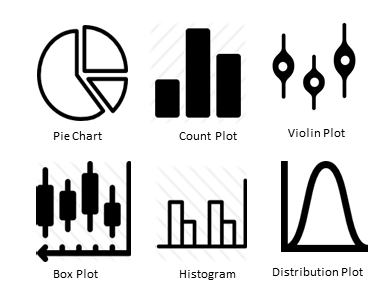

What type of univarate plot would you like to see?


Button(description='Histogram', style=ButtonStyle())

Button(description='Count Plot', style=ButtonStyle())

Button(description='Box Plot', style=ButtonStyle())

Button(description='Distribution Plot', style=ButtonStyle())

Button(description='Violin Plot', style=ButtonStyle())

Button(description='Pie Chart', style=ButtonStyle())

Output()

In [605]:
univarategraph()

# 8. Outlier Detection and Treatment

In [606]:
#for finding the number of outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    l_limit=Q1-(2*IQR)
    u_limit=Q3+(2*IQR)
    for out1 in column:
        if out1>u_limit or out1<l_limit:
            outliers.append(out1)
            
    return np.array(outliers)

#to remove the outliers for the variable(s)
def remove_outlier(df,col):
    sorted(col)
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

#when all outliers are removed together
def remove():
    for i in num_list:
        low,high=remove_outlier(data,i)
        data[i]=np.where(data[i] > high,high,data[i])
        data[i]=np.where(data[i] < low,low,data[i])

#when outliers for numerical variables are treated individually 
def remove_individual(i):
    low,high=remove_outlier(data,i)
    data[i]=np.where(data[i] > high,high,data[i])
    data[i]=np.where(data[i] < low,low,data[i])


In [607]:
#to display a list of all numerical variables with a the number of outliers
def print_outlier():
    outlist = list(range(0,len(num_list))) #list of 0 - 11 numbers
    outliers = pd.DataFrame({'Column Name': [num_list[0]],'Number of Outliers': [outlist]}) # give column name string value, number of outliers int value
    for i in range(0,len(num_list)):
        out = findoutliers(data[num_list[i]])
        out1 = len(out)
        outliers.at[i,'Number of Outliers'] = out1
        outliers.at[i,'Column Name'] = num_list[i]
    return outliers
print_outlier()

,Column Name,Number of Outliers
0,Price,165
1,Living_space,106
2,Lot,258
3,Usable_area,284
4,Rooms,130
5,Bedrooms,96
6,Bathrooms,50
7,Floors,4
8,Year_built,61
9,Year_renovated,292


In [609]:
# for treatment of outliers

def outlier():
    
    a = 0
    print('Would you like to remove outliers for all numerical columns?')
    button1 = widgets.Button(description="Yes")
    button2 = widgets.Button(description="No")
    output = widgets.Output()

    display(button1, button2, output)

    def on_button1_clicked(b): #for removing outliers of variables individually
        with output:
            print("Removing outliers for all numerical variables")
            print("New number of outliers")
            remove()
            a = 1
    def on_button2_clicked(b):
        with output:
            print("Not removing outliers therefore select individually")
            for i in range(0,len(num_list)):
                print ("Please choose treatment action for " + num_list[i])
                button7 = widgets.Button(description="Remove outliers for " +num_list[i])
                button8 = widgets.Button(description="Do Not remove outliers for " +num_list[i])
                output2 = widgets.Output()
                display(button7, button8, output2)
                
                
                def on_button7_clicked(b1):
                    with output2:
                        s = b1.description.split(" ")
                        print("Removing Outliers for " + s[len(s)-1])
                        remove_individual(s[len(s)-1])
                    
               
                def on_button8_clicked(b1):
                    with output2:
                        s = b1.description.split(" ")
                        print("Not removing outliers for " + s[len(s)-1])
                
                
                button7.on_click(on_button7_clicked)
                button8.on_click(on_button8_clicked)
                
    button1.on_click(on_button1_clicked)
    button2.on_click(on_button2_clicked)
    return a
b = outlier()

Would you like to remove outliers for all numerical columns?


Button(description='Yes', style=ButtonStyle())

Button(description='No', style=ButtonStyle())

Output()

In [610]:
#displaying the updated number of outliers and a statistcial analysis table of all numerical variables
print_outlier()
data.describe().T

,Column Name,Number of Outliers
0,Price,0
1,Living_space,0
2,Lot,0
3,Usable_area,0
4,Rooms,0
5,Bedrooms,0
6,Bathrooms,0
7,Floors,0
8,Year_built,0
9,Year_renovated,0


,count,mean,std,min,25%,50%,75%,max
Price,3142.0,613111.522314,383023.601230,0.00000,340000.000000,525000.000000,790000.0000,1.465000e+06
Living_space,3142.0,200.351690,90.900951,20.00000,133.007500,175.000000,246.8725,4.176700e+02
Lot,3142.0,771.472973,533.009613,0.00000,370.000000,637.500000,1000.0000,1.945000e+03
Usable_area,3142.0,75.316031,47.659645,0.00000,50.000000,50.000000,100.0000,1.750000e+02
Rooms,3142.0,6.705124,2.609069,1.00000,5.000000,6.000000,8.0000,1.250000e+01
Bedrooms,3142.0,4.097708,1.692258,0.00000,3.000000,4.000000,5.0000,8.000000e+00
Bathrooms,3142.0,2.229158,1.186151,0.00000,1.000000,2.000000,3.0000,6.000000e+00
Floors,3142.0,2.371736,0.711448,0.50000,2.000000,2.374601,3.0000,4.500000e+00
Year_built,3142.0,1966.083068,41.475452,1853.00000,1940.000000,1974.000000,1998.0000,2.022000e+03
Year_renovated,3142.0,2012.064506,3.980491,2005.04768,2011.019072,2011.019072,2015.0000,2.020971e+03


In [611]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               3142 non-null   float64
 1   Type                3142 non-null   object 
 2   Living_space        3142 non-null   float64
 3   Lot                 3142 non-null   float64
 4   Usable_area         3142 non-null   float64
 5   Free_of_Relation    3142 non-null   object 
 6   Rooms               3142 non-null   float64
 7   Bedrooms            3142 non-null   float64
 8   Bathrooms           3142 non-null   float64
 9   Floors              3142 non-null   float64
 10  Year_built          3142 non-null   float64
 11  Furnishing_quality  3142 non-null   object 
 12  Year_renovated      3142 non-null   float64
 13  State               3142 non-null   object 
 14  City                3142 non-null   object 
 15  Place               3142 non-null   object 
 16  Garage

# 9. Multivariate non-graphical analysis

In [612]:
#for displaying multi-variate analysis based on non-numerical and numerical data
test= data.groupby(by="Type")
test.describe()

#for i in range(0,len(obj_list)):
#temp = data.groupby(by=data[obj_list[i]])
#temp.describe()

Price                                          \
                       count          mean            std        min   
Type                                                                   
Bungalow                81.0  7.484890e+05  480318.140163    28680.0   
Castle                   2.0  1.465000e+06       0.000000  1465000.0   
Corner house            56.0  5.058196e+05  433784.244654        0.0   
Duplex                 568.0  6.642803e+05  367641.397521        0.0   
Farmhouse              175.0  4.744508e+05  240616.483316    32500.0   
Mid-terrace house     1350.0  5.716605e+05  356559.341941    20000.0   
Multiple dwelling      117.0  5.703316e+05  306796.449888    38500.0   
Residential property   114.0  6.478501e+05  448786.007603        0.0   
Single dwelling        421.0  5.442562e+05  337188.740824    29500.0   
Special property       113.0  5.366783e+05  316780.677181    23000.0   
Villa                  145.0  1.186695e+06  369431.681110        0.0   

                                                                 Living_space  \
                            25%        50%        75%        max        count   
Type                                                                            
Bungalow               359000.0   699000.0  1150000.0  1465000.0         81.0   
Castle                1465000.0  1465000.0  1465000.0  1465000.0          2.0   
Corner house           229500.0   339500.0   561250.0  1465000.0         56.0   
Duplex                 397250.0   594000.0   859250.0  1465000.0        568.0   
Farmhouse              329000.0   450000.0   598000.0  1465000.0        175.0   
Mid-terrace house      316000.0   495000.0   749000.0  1465000.0       1350.0   
Multiple dwelling      375000.0   525000.0   690000.0  1465000.0        117.0   
Residential property   304000.0   539000.0   913750.0  1465000.0        114.0   
Single dwelling        329000.0   455000.0   685000.0  1465000.0        421.0   
Special property       339000.0   479000.0   695000.0  1465000.0        113.0   
Villa                  892000.0  1465000.0  1465000.0  1465000.0        145.0   

                                                     ... Year_renovated  \
                            mean         std    min  ...            25%   
Type                                                 ...                  
Bungalow              270.797778  115.528727   20.0  ...    2011.000000   
Castle                373.335000   62.699158  329.0  ...    2005.285760   
Corner house          224.460179  102.493169   70.0  ...    2005.047680   
Duplex                272.843028   90.819682   21.3  ...    2011.019072   
Farmhouse             131.914229   33.078756   54.0  ...    2011.019072   
Mid-terrace house     184.154570   69.609916   41.0  ...    2011.019072   
Multiple dwelling     138.178718   33.449290   61.0  ...    2011.019072   
Residential property  216.188772  108.615886   40.0  ...    2011.019072   
Single dwelling       148.530048   50.113690   30.0  ...    2011.019072   
Special property      148.812124   69.207627   25.0  ...    2011.019072   
Villa                 327.076552   81.372230  120.0  ...    2011.019072   

                                                           Garages            \
                              50%         75%          max   count      mean   
Type                                                                           
Bungalow              2011.019072  2014.00000  2020.000000    81.0  3.000000   
Castle                2005.523840  2005.76192  2006.000000     2.0  1.500000   
Corner house          2011.019072  2012.00000  2020.000000    56.0  2.607143   
Duplex                2011.019072  2016.00000  2020.971392   568.0  3.096831   
Farmhouse             2011.019072  2017.00000  2020.000000   175.0  1.491429   
Mid-terrace house     2011.019072  2014.00000  2020.000000  1350.0  2.137778   
Multiple dwelling     2011.019072  2014.00000  2020.000000   117.0  1.700855   
Residential property  2011.0

<Figure size 1080x1080 with 0 Axes>

<AxesSubplot:>

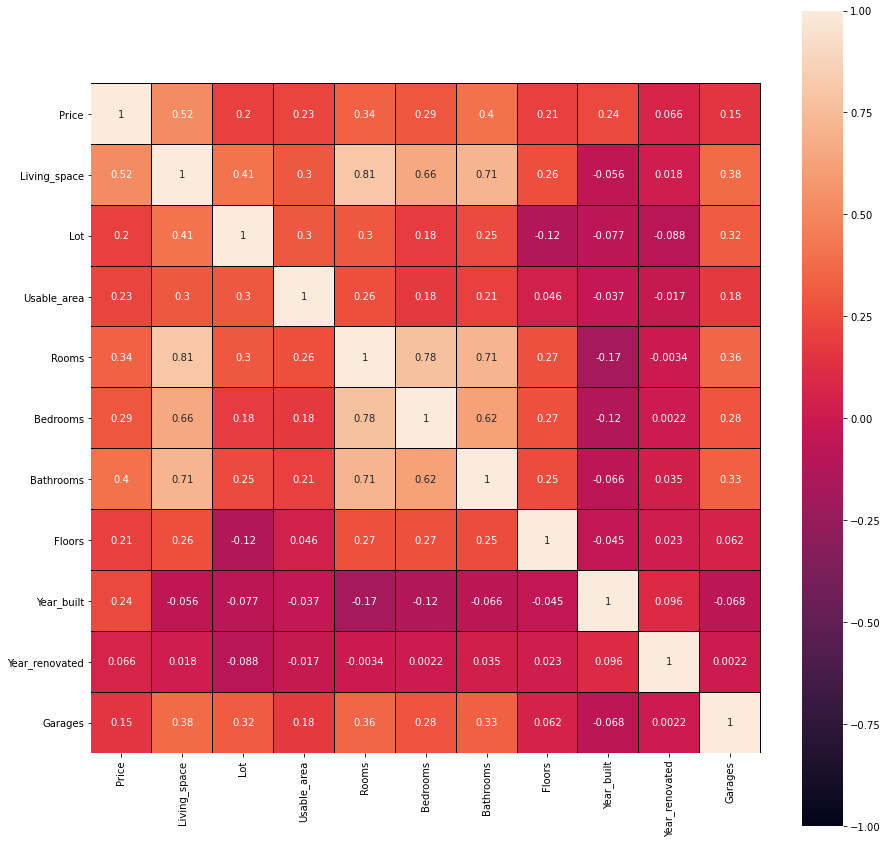

In [613]:
# for creating a heatmap
plt.figure(figsize=(15,15))
sn.heatmap(data.corr(),vmax=1.0,vmin=-1.0,linewidths=0.01,square=True,annot=True,cmap='rocket',linecolor='black') # strong correlation of price and lot_measure,lat
plt.show()

In [614]:
#for creating and dispalying a list of best and worst correlated variables
counter = 0
corr_list = pd.DataFrame({'Column 1': [""],'Column 2':[""],'Correlation value': [0.0]})
for i in range(0,len(num_list)):
    for j in range(i,len(num_list)):
        column_1 = data[num_list[i]]
        column_2 = data[num_list[j]]
        corrd = column_1.corr(column_2)
        if (corrd>0.6 and corrd<0.99) or (corrd>-1 and corrd<-0.1):
            corr_list.at[counter,'Column 1']=num_list[i]
            corr_list.at[counter,'Column 2']=num_list[j]
            corr_list.at[counter,'Correlation value']=corrd
            counter +=1
            #print ("Correlation between "+i+" and "+j+" is "+(str)(corrd))
corr_list

,Column 1,Column 2,Correlation value
0,Living_space,Rooms,0.811384
1,Living_space,Bedrooms,0.658856
2,Living_space,Bathrooms,0.711337
3,Lot,Floors,-0.120534
4,Rooms,Bedrooms,0.780060
5,Rooms,Bathrooms,0.714529
6,Rooms,Year_built,-0.172318
7,Bedrooms,Bathrooms,0.622705
8,Bedrooms,Year_built,-0.119826


# 10. Multivariate graphical Analysis

In [659]:
#for creating scatter plot
def scatter(x, y, theme, color): 
    data.iplot(kind='scatter', x=x, y=y, mode='markers',  
             xTitle=x.title(), yTitle=y.title(), theme=theme, colorscale=color)
# for creating bar plot
def bar(x, y):
    #fig=px.bar(data, x = x, y= y)
    #fig.show()
    @interact
    def bar1(color = obj_list):
        fig = px.bar(data, x=x, y =y, range_y = (0,data[y].max()), color = color)
        fig.show()

#for creating histogram 
def histo(x,y):
    fig = px.histogram(data, x=x, y= y)
    fig.show()

#for creating scatter plot with trendline    
def regplot(x,y):
    if(y in obj_list or x in obj_list):
        print('Kindly select 2 numerical variables')
    else:
        fig = px.scatter(data, x=x,y=y, trendline="lowess")
        fig.show()

#for creating subplots    
def subplots_option():
    @interact_manual
    def multiple(x=list(data.columns), y=list(data.select_dtypes('number').columns), 
                 z = list(data.select_dtypes('number').columns[::-1]),color = obj_list):
        
        # to form a display page with 4 subplots
        fig = make_subplots(rows=2, cols=2,specs=[[{"type": "bar"}, {"type": "scatter"}],[{"type": "bar"}, {"type": "scatter3d"}]],)
        
        fig.add_trace(go.Bar(x = data[x], y = data[y]),row=1, col=1)
        
        fig.add_trace(go.Scatter(x=data[x], y=data[y], mode='markers'),row=1, col=2)
        
        fig.add_trace(go.Bar(x = data[color]),row=2, col=1)
        
        fig.add_trace(go.Scatter3d(x=data[x], y=data[y],z=data[z], mode="lines"),row=2, col=2)
        
        fig.update_layout(height=700, showlegend=False)
        
        fig.show()

#for creating 3D plots
def threedim(x,y):
    @interact_manual
    def zvalue(z = data_col):
        
        button1 = widgets.Button(description = "Regular 3D Plot") 
        button2 = widgets.Button(description = "Ternany Plot")
        button3 = widgets.Button(description = "3D Scatter Plot")
        output=widgets.Output()
        display(button1, button2, button3, output)
        def on_button1_clicked(b):
            with output:                                        #for creating regular 3D plots
                print ("Regular 3d Plot")
                fig = go.Figure(data=[go.Mesh3d(z=data[z],y=data[y],x=data[x])])
                #fig.update_layout(title=x+" vs "+y+" vs "+z, autosize=True,margin=dict(l=10, r=10, b=50, t=100))
                fig.show()
        def on_button2_clicked(b):
            with output:                                        # for creating ternary 3D plots (for normalized variales)
                print ("Ternary Plot")
                fig = px.scatter_ternary(data, a=x, b=y, c=z)
                fig.show()
        def on_button3_clicked(b):
            with output:                                        # for creating 3D scatter plots
                @interact
                def scatter3d(color = obj_list):
                    print ("3d Scatter Plot")
                    fig = px.scatter_3d(data, x=x, y=y, z=z,
                                        color=color)
                    # tight layout
                    #fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
                    fig.show()
        button1.on_click(on_button1_clicked)
        button2.on_click(on_button2_clicked)
        button3.on_click(on_button3_clicked)

In [660]:
#for displaying buttons and lists with plot options
@interact
def scatter_plot(x=list(data.select_dtypes('number').columns), 
                 y=list(data.columns[::-1]),
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    
    I2 = Image(filename = 'Images_multi.png', width = 500, height = 500)
    display(I2)
    button1 = widgets.Button(description = "Scatter Plot") 
    button2 = widgets.Button(description = "Bar Plot")
    button3 = widgets.Button(description = "Histogram")
    button4 = widgets.Button(description = "Scatter Plot (Trendline)")
    button5 = widgets.Button(description = "3D Plots")
    button6 = widgets.Button(description = "Subplots")
    output=widgets.Output()
    display(button1, button2, button3,button4,button5,button6, output)
    def on_button1_clicked(b):
        with output:
            print ("Scatter Plot")
            scatter(x, y, theme, colorscale)
    def on_button2_clicked(b):
        with output:
            print ("Bar Plot")
            bar(x, y)
    def on_button3_clicked(b):
        with output:
            print ("Histogram")
            histo(x, y)
    def on_button4_clicked(b):   
        with output:
            print ("Scatter Plot (Trendline)")
            regplot(x, y)
    def on_button5_clicked(b):
        with output:
            print ("3D plot options")
            threedim(x,y)
    def on_button6_clicked(b):
        with output:
            print ("Subplots")
            subplots_option()
    
    button1.on_click(on_button1_clicked)
    button2.on_click(on_button2_clicked)
    button3.on_click(on_button3_clicked)
    button4.on_click(on_button4_clicked)
    button5.on_click(on_button5_clicked)
    button6.on_click(on_button6_clicked)


interactive(children=(Dropdown(description='x', options=('Price', 'Living_space', 'Lot', 'Usable_area', 'Rooms…

# 11. Normalization

In [625]:
#plotting a scatter plot between un-normalized Price and Rooms columns for reference
fig = px.scatter(data, x='Price',y='Rooms', trendline="lowess")
fig.show()

In [626]:
#for normalizing all numerical variables and storing it in a different dataset
data_num = data.reset_index(drop = True)
for i in num_list:
    data_num[i] = (data_num[i]- data_num[i].min()) / (data_num[i].max()-data_num[i].min())
data_num.head()


,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Furnishing_quality,Year_renovated,State,City,Place,Garages,Garagetype
0,0.339932,Multiple dwelling,0.216260,0.117738,0.285714,01.10.2020,0.391304,0.375,0.166667,0.37500,0.899408,normal,0.375000,Baden-Württemberg,Bodenseekreis,Bermatingen,0.2,Parking lot
1,0.337884,Mid-terrace house,0.304096,0.265810,0.114286,01.01.2021,0.434783,0.375,0.333333,0.46865,0.834320,basic,0.375000,Baden-Württemberg,Konstanz (Kreis),Engen,1.0,Parking lot
2,0.511263,Farmhouse,0.359318,0.042159,0.214971,01.07.2020,0.347826,0.375,0.333333,0.87500,0.946746,normal,0.375000,Baden-Württemberg,Esslingen (Kreis),Ostfildern,0.0,Garage
3,0.320137,Multiple dwelling,0.238892,0.125450,0.285714,sofort,0.304348,0.250,0.166667,0.46865,0.680473,refined,0.876198,Baden-Württemberg,Esslingen (Kreis),Leinfelden-Echterdingen,0.0,Garage
4,0.248464,Duplex,0.520532,0.500257,0.474286,nach Absprache,0.782609,0.500,0.666667,0.37500,0.000000,normal,0.625000,Baden-Württemberg,Enzkreis,Neuenbürg,1.0,Parking lot


In [627]:
#finding correlation between numerical variables
data.corr()
counter = 0
corr_list = pd.DataFrame({'Column 1': [""],'Column 2':[""],'Correlation value': [0.0]})
for i in range(0,len(num_list)):
    for j in range(i,len(num_list)):
        column_1 = data_num[num_list[i]]
        column_2 = data_num[num_list[j]]
        corrd = column_1.corr(column_2)
        if (corrd>0.6 and corrd<0.99) or (corrd>-1 and corrd<-0.1):
            corr_list.at[counter,'Column 1']=num_list[i]
            corr_list.at[counter,'Column 2']=num_list[j]
            corr_list.at[counter,'Correlation value']=corrd
            counter +=1
            #print ("Correlation between "+i+" and "+j+" is "+(str)(corrd))
corr_list

,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages
Price,1.000000,0.523431,0.203216,0.225715,0.336154,0.291598,0.398465,0.205905,0.235530,0.066014,0.148438
Living_space,0.523431,1.000000,0.413256,0.299736,0.811384,0.658856,0.711337,0.261372,-0.055750,0.018419,0.378274
Lot,0.203216,0.413256,1.000000,0.303098,0.298450,0.179956,0.247364,-0.120534,-0.076683,-0.088392,0.315206
Usable_area,0.225715,0.299736,0.303098,1.000000,0.258425,0.179183,0.210678,0.046482,-0.037401,-0.017042,0.178879
Rooms,0.336154,0.811384,0.298450,0.258425,1.000000,0.780060,0.714529,0.269804,-0.172318,-0.003369,0.357442
Bedrooms,0.291598,0.658856,0.179956,0.179183,0.780060,1.000000,0.622705,0.270459,-0.119826,0.002176,0.282126
Bathrooms,0.398465,0.711337,0.247364,0.210678,0.714529,0.622705,1.000000,0.250113,-0.066277,0.035119,0.328563
Floors,0.205905,0.261372,-0.120534,0.046482,0.269804,0.270459,0.250113,1.000000,-0.045280,0.022759,0.061961
Year_built,0.235530,-0.055750,-0.076683,-0.037401,-0.172318,-0.119826,-0.066277,-0.045280,1.000000,0.096152,-0.068164
Year_renovated,0.066014,0.018419,-0.088392,-0.017042,-0.003369,0.002176,0.035119,0.022759,0.096152,1.000000,0.002212


,Column 1,Column 2,Correlation value
0,Living_space,Rooms,0.811384
1,Living_space,Bedrooms,0.658856
2,Living_space,Bathrooms,0.711337
3,Lot,Floors,-0.120534
4,Rooms,Bedrooms,0.780060
5,Rooms,Bathrooms,0.714529
6,Rooms,Year_built,-0.172318
7,Bedrooms,Bathrooms,0.622705
8,Bedrooms,Year_built,-0.119826


In [628]:
# plotting a ternary plot for reference.
print ("Regular 3d Plot")
fig = px.scatter_ternary(data_num, a=data_num["Price"],b=data_num["Rooms"],c=data_num["Bathrooms"])
#fig.update_layout(title=x+" vs "+y+" vs "+z, autosize=True,margin=dict(l=10, r=10, b=50, t=100))
fig.show()

Regular 3d Plot


In [629]:
# plotting a scatter plor for reference
fig = px.scatter(data_num, x="Price",y="Rooms", trendline="lowess")
fig.show()